# Data Loading

In the first step, we load the required data for our analysis. We read the electric vehicle population data and the census median income data from their respective CSV files.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

electric_vehicle_population = pd.read_csv("EV-data.csv")
census_median_income = pd.read_csv("census-data.csv")

# Clean Vehicle Data

To simplify the column names for easier use in python, we will rename the columns to lowercase and replace spaces with underscores. We will also remove the four rows where the "model" column contains NA values. Additionally, we will create a new column, "vehicle," by combining the "year," "make," and "model" fields.

In [3]:
electric_vehicle_population.columns = electric_vehicle_population.columns.str.lower().str.replace(' ', '_')

electric_vehicle_population_clean = electric_vehicle_population.dropna(subset=['model'])

electric_vehicle_population_clean['vehicle'] = electric_vehicle_population_clean['model_year'].astype(str) + ' ' + electric_vehicle_population_clean['make'] + ' ' + electric_vehicle_population_clean['model']
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].fillna(0).astype(int).astype(str)
electric_vehicle_population_clean.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,vehicle
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,2013 NISSAN LEAF
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2019 TESLA MODEL S
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,2021 VOLKSWAGEN ID.4
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10,2017 TOYOTA PRIUS PRIME
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10,2016 FORD C-MAX


# Clean Income Data
We are interested in the column `S1903_C03_001E`. To focus on zip codes and income data, we’ll clean the table by extracting zip codes, which are strings starting with “ZCTA5,” and removing the prefix to isolate the zip codes. This will leave us with a simplified table containing two columns: `zip_code` and `median_household_income`. Rows with missing income data are marked with “-”, so we’ll filter those out.

In [4]:
census_median_income.head()

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,8600000US98001,ZCTA5 98001,11648,558,7681,506,716,198,183,100,...,7519,135112,33727,58490,13059,47045,17376,69176,3830,NaN
2,8600000US98002,ZCTA5 98002,13162,583,8812,611,1071,289,299,140,...,4679,70682,15215,39757,7832,33634,2709,81544,27741,NaN
3,8600000US98003,ZCTA5 98003,18515,823,10454,663,2887,553,114,68,...,6290,81797,15871,37839,9764,29226,3739,95114,33065,NaN
4,8600000US98004,ZCTA5 98004,17460,660,10494,616,372,187,26,39,...,11161,131719,34582,118875,15335,117807,17404,119841,48138,NaN


In [5]:
census_median_income_clean = census_median_income.iloc[1:].copy()
census_median_income_clean = census_median_income_clean[['NAME', 'S1903_C03_001E']]
census_median_income_clean = census_median_income_clean.rename(columns={'S1903_C03_001E': 'median_household_income'})
census_median_income_clean = census_median_income_clean.dropna(subset=['median_household_income'])

# Extract zip codes and clean data
census_median_income_clean['zip_code'] = census_median_income_clean['NAME'].str.split(' ').str[-1]
census_median_income_clean = census_median_income_clean[['zip_code', 'median_household_income']]

# Filter out rows with missing income data
census_median_income_clean = census_median_income_clean[census_median_income_clean['median_household_income'] != '-']

census_median_income_clean.head()

,zip_code,median_household_income
1,98001,88962
2,98002,59097
3,98003,59560
4,98004,142173
5,98005,135225


# Bill 2042

The House Bill 2042 aims to reduce CO2 emissions by incentivizing residents to switch to more environmentally friendly means of transportation by offering tax refunds for newly bought electric vehicles. We want to investigate if this bill, which was passed in 2019, could have a beneficial effect and if sales of EVs did increase. Additionally, we want to see if there is a difference for low-income households as they might benefit from that tax refund disproportionately.

Do do that, we want to perform the following steps:

1. **Merge DataFrames**: It merges the `electric_vehicle_population_clean` DataFrame with the `census_median_income_clean` DataFrame on the `postal_code` and `zip_code` columns using an inner join. This filters out any non-Washington zip codes.

2. **Group by Model Year**: It groups the merged DataFrame by `model_year` and calculates the total number of vehicles for each year. The result is stored in `electric_vehicle_bill2042_grouped`.

3. **Plotting**:
    - It creates a figure with two subplots.
    - The first subplot is a scatter plot showing the relationship between `model_year` and the total number of electric vehicles (`vehicle_n`) across the state.
    - The second subplot displays a table with the sorted values of `electric_vehicle_bill2042_grouped`.

4. **Plot Customization**: It customizes the plot by setting titles, labels, rotating x-axis labels, and adding a grid.

5. **Display**: It adjusts the layout and displays the plot and table.

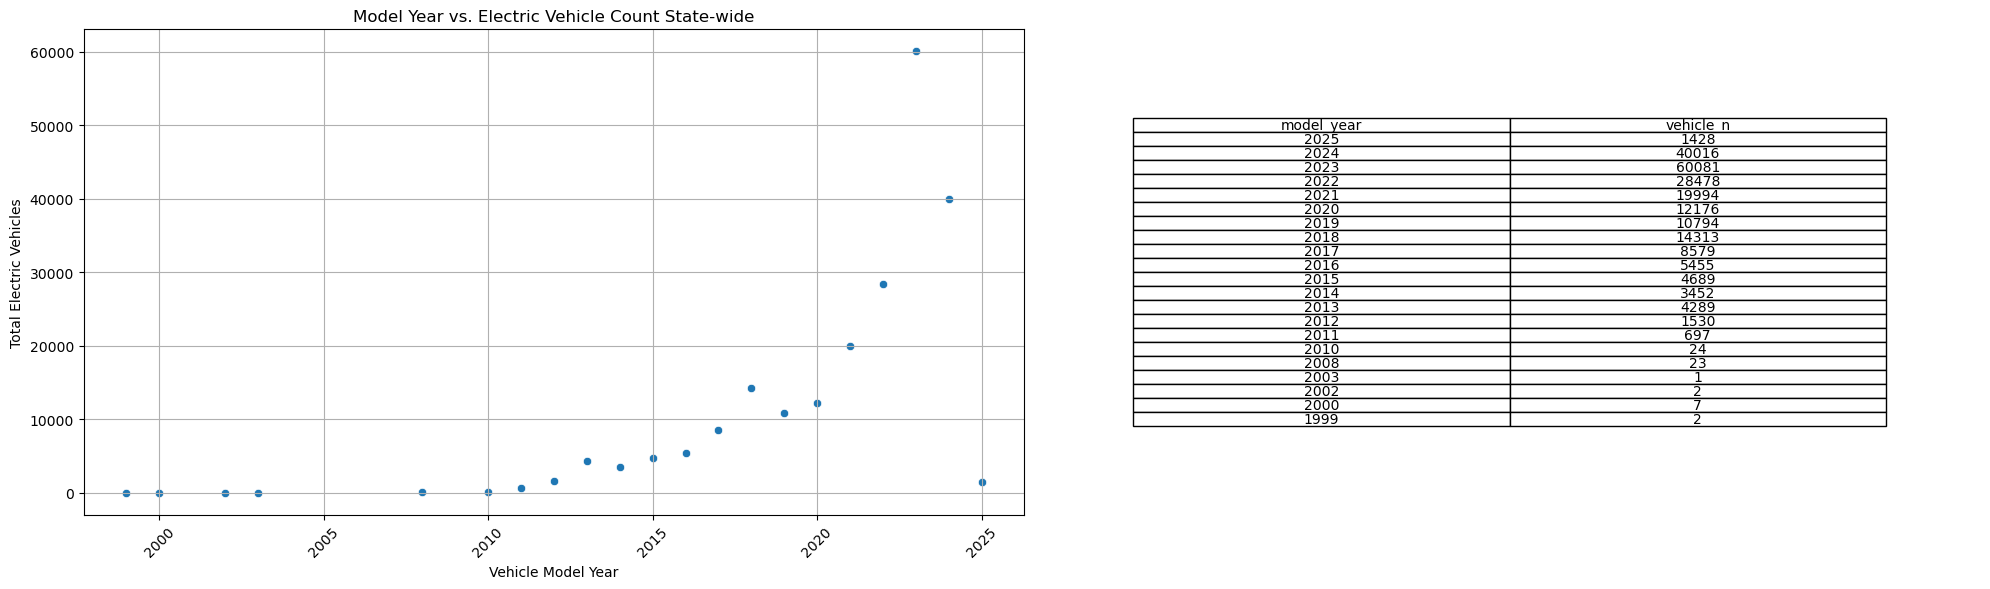

In [12]:
# Join census dataframe with electric vehicle dataframe. Inner join filters out any non-Washington zips.
electric_vehicle_bill2042 = pd.merge(electric_vehicle_population_clean, census_median_income_clean, left_on='postal_code', right_on='zip_code')

# Group by model year and get total vehicles per year.
electric_vehicle_bill2042_grouped = electric_vehicle_bill2042.groupby('model_year').size().reset_index(name='vehicle_n')

# Join census dataframe with electric vehicle dataframe. Inner join filters out any non-Washington zips.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot
sns.scatterplot(x='model_year', y='vehicle_n', data=electric_vehicle_bill2042_grouped, ax=ax[0])
ax[0].set_title('Model Year vs. Electric Vehicle Count State-wide')
ax[0].set_xlabel('Vehicle Model Year')
ax[0].set_ylabel('Total Electric Vehicles')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Display the list
ax[1].axis('off')
table = ax[1].table(cellText=electric_vehicle_bill2042_grouped.sort_values(by='model_year', ascending=False).values,
                    colLabels=electric_vehicle_bill2042_grouped.columns,
                    cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 0.8)

plt.tight_layout()
plt.show()

The dataset indicates an increase in electric vehicle sales starting in 2016, with a significant surge beginning in 2020, one year after the bill was passed. By 2023, sales had increased almost sixfold compared to pre-2019 levels. The low number of sales in 2025 can likely be attributed to the dataset being collected in 2024, representing pre-purchased 2025 models up to that point.

**Limitations:** This dataset alone does not conclusively prove that Bill 2042 was the driving factor behind the increase in sales. The rise could also be attributed to a general increase in the popularity of electric vehicles.

### Sales for Low-Income Household Areas

In the next code snippet, we filter out all high-income regions to analyze if there is a difference in electric vehicle sales compared to the overall population.

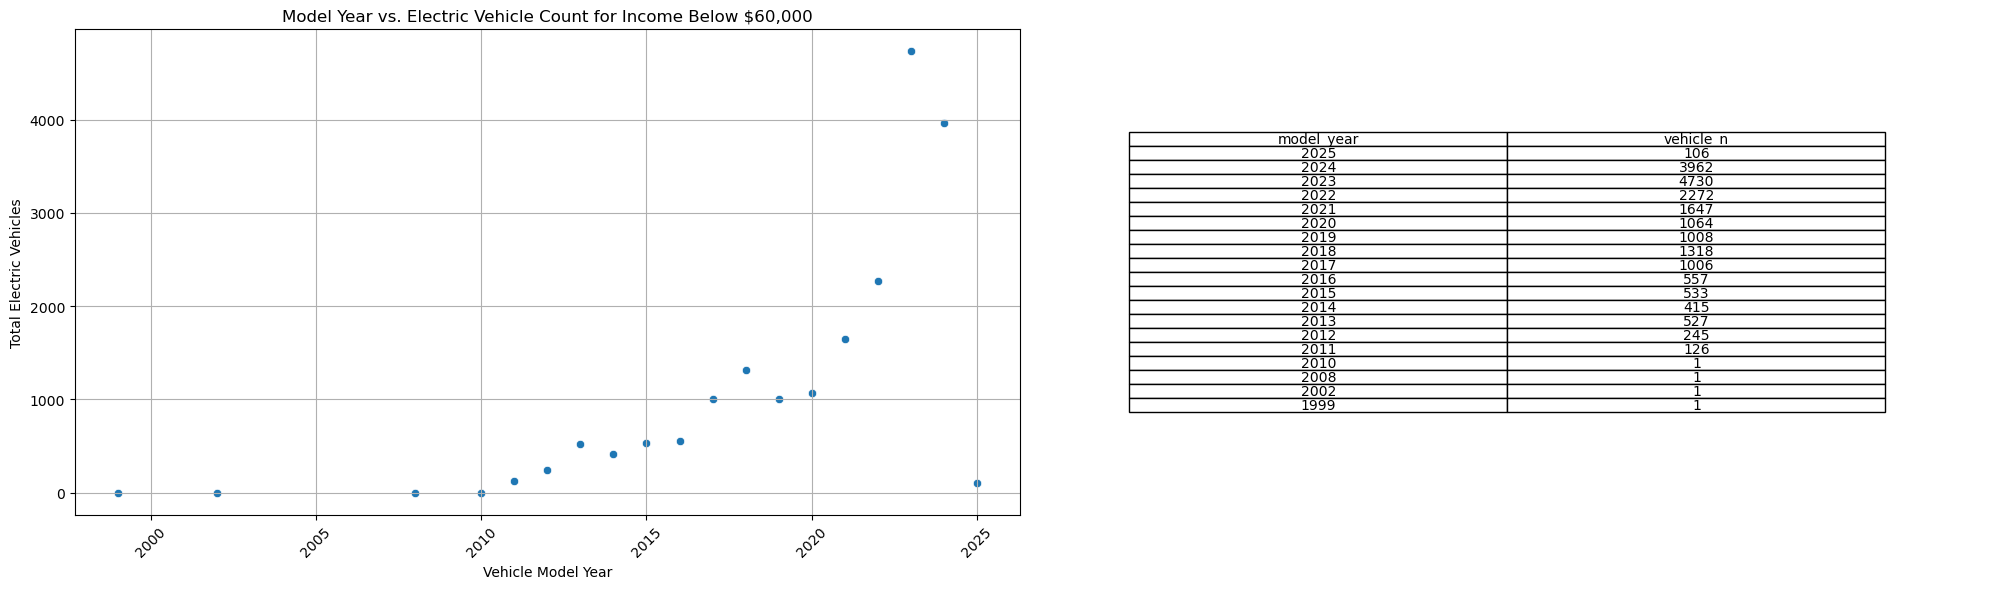

In [13]:
# Convert median_household_income to numeric
electric_vehicle_bill2042['median_household_income_num'] = pd.to_numeric(electric_vehicle_bill2042['median_household_income'])

# Filter for income below $64,000, then group by model year and get vehicle count
electric_vehicle_bill2042_filter = electric_vehicle_bill2042[electric_vehicle_bill2042['median_household_income_num'] <= 60000]
electric_vehicle_bill2042_filter_grouped = electric_vehicle_bill2042_filter.groupby('model_year').size().reset_index(name='vehicle_n')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(x='model_year', y='vehicle_n', data=electric_vehicle_bill2042_filter_grouped, ax=ax[0])
ax[0].set_title('Model Year vs. Electric Vehicle Count for Income Below $60,000')
ax[0].set_xlabel('Vehicle Model Year')
ax[0].set_ylabel('Total Electric Vehicles')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Display the list
ax[1].axis('off')
table = ax[1].table(cellText=electric_vehicle_bill2042_filter_grouped.sort_values(by='model_year', ascending=False).values,
                    colLabels=electric_vehicle_bill2042_filter_grouped.columns,
                    cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 0.8)

plt.tight_layout()
plt.show()

The data suggests a similar trend to the overall population, with sales in 2023 nearly quadrupling compared to pre-2019 levels.

However, the data does not conclusively show that lower-income areas were more likely to purchase a new EV after the bill was passed.

# CAFV eligibility
It would be insightful to analyze whether vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) designation, which indicates eligibility for certain incentives and benefits due to their environmentally friendly features, tend to perform better in sales. Additionally, examining how these sales trends evolve over time could provide valuable insights.

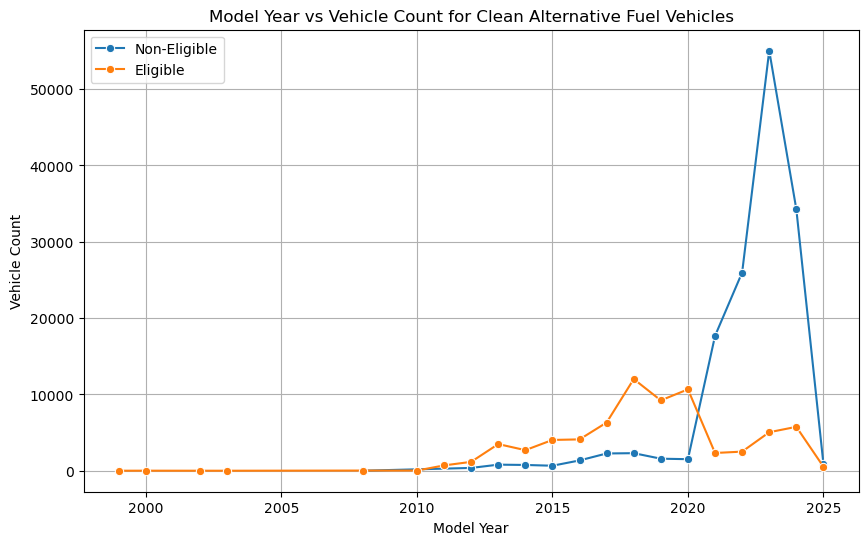

In [14]:
electric_vehicle_bill2042['clean_alternative_fuel_vehicle_(cafv)_eligibility'] = electric_vehicle_bill2042['clean_alternative_fuel_vehicle_(cafv)_eligibility'].apply(lambda x: 1 if x == 'Clean Alternative Fuel Vehicle Eligible' or x == 1 else 0)

electric_vehicle_bill2042_grouped_eligibility = electric_vehicle_bill2042.groupby(['clean_alternative_fuel_vehicle_(cafv)_eligibility', 'model_year']).size().reset_index(name='vehicle_n')


plt.figure(figsize=(10, 6))
sns.lineplot(data=electric_vehicle_bill2042_grouped_eligibility[electric_vehicle_bill2042_grouped_eligibility['clean_alternative_fuel_vehicle_(cafv)_eligibility'] == 0], x='model_year', y='vehicle_n', marker='o', label='Non-Eligible')
sns.lineplot(data=electric_vehicle_bill2042_grouped_eligibility[electric_vehicle_bill2042_grouped_eligibility['clean_alternative_fuel_vehicle_(cafv)_eligibility'] == 1], x='model_year', y='vehicle_n', marker='o', label='Eligible')
plt.title('Model Year vs Vehicle Count for Clean Alternative Fuel Vehicles')
plt.xlabel('Model Year')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()


Prior to 2019, cars eligible for the Clean Alternative Fuel Vehicle (CAFV) designation tended to perform better in sales. However, post-2019, this attribute appears to have lost its significance. It remains unclear whether the passing of the bill made this criterion less relevant or if other factors contributed to this shift.